In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-13 22:58:36.645104


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1095.6575)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 64


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.4577)tensor(5.7409)tensor(4.1276)tensor(4.1016)tensor(4.5918)tensor(2.5441)tensor(7.3446)tensor(3.2528)tensor(3.3295)tensor(3.4315)tensor(4.6605)tensor(3.0738)tensor(3.4741)tensor(4.8084)tensor(3.6484)tensor(3.9608)tensor(4.6557)tensor(2.9192)tensor(3.8949)tensor(4.3093)tensor(8.5634)tensor(4.2896)tensor(5.8888)tensor(4.4104)tensor(6.7460)tensor(8.1436)tensor(5.9145)tensor(6.4890)tensor(6.6712)tensor(8.7156)tensor(6.6655)tensor(4.9924)tensor(7.6890)tensor(11.7860)tensor(4.4865)tensor(4.2715)tensor(8.2696)tensor(7.0312)tensor(5.7922)tensor(5.0494)tensor(3.0883)tensor(5.3383)tensor(5.6221)tensor(4.3206)tensor(4.1708)tensor(4.6793)tensor(7.1807)tensor(7.5885)tensor(7.8039)tensor(5.4180)tensor(2.8375)tensor(4.2353)tensor(3.8660)tensor(4.3102)tensor(5.3112)tensor(5.5226)tensor(4.5351)tensor(4.4599)tensor(4.7675)tensor(6.2219)tensor(3.1361)tensor(4.2031)tensor(5.6639)tensor(7.2224)tensor(5.7864)tensor(3.6177)tensor(3.1784)tensor(3.4083)tensor(3.2086)tensor(5.8609)tensor(3.1958)tenso

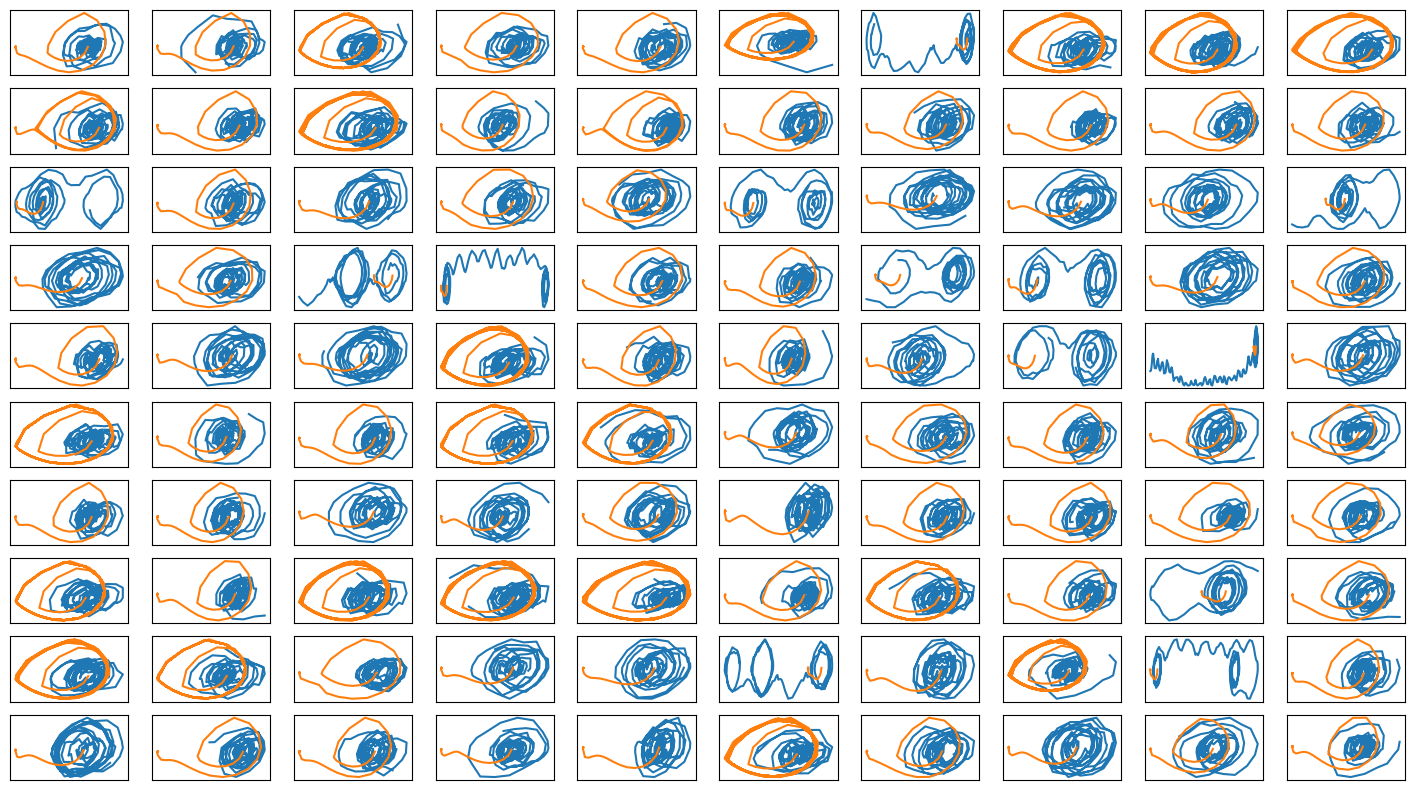

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 16618.34056  validloss 506.79295±0.00000  bestvalidloss 506.79295  last_update 0
train: iter 1  trainloss 524.77722  validloss 384.85359±0.00000  bestvalidloss 384.85359  last_update 0
train: iter 2  trainloss 424.23134  validloss 360.56802±0.00000  bestvalidloss 360.56802  last_update 0
train: iter 3  trainloss 406.84952  validloss 348.43716±0.00000  bestvalidloss 348.43716  last_update 0
train: iter 4  trainloss 333.09959  validloss 303.94051±0.00000  bestvalidloss 303.94051  last_update 0
train: iter 5  trainloss 251.98084  validloss 241.17936±0.00000  bestvalidloss 241.17936  last_update 0
train: iter 6  trainloss 167.14883  validloss 123.77485±0.00000  bestvalidloss 123.77485  last_update 0
train: iter 7  trainloss 129.74557  validloss 62.25047±0.00000  bestvalidloss 62.25047  last_update 0
train: iter 8  trainloss 105.95923  validloss 54.54202±0.00000  bestvalidloss 54.54202  last_update 0
train: iter 9  trainloss 86.96029  validloss 10

train: iter 77  trainloss -387.26555  validloss -521.50139±0.00000  bestvalidloss -530.82604  last_update 1
train: iter 78  trainloss -389.69830  validloss -538.72414±0.00000  bestvalidloss -538.72414  last_update 0
train: iter 79  trainloss -392.40729  validloss -546.25393±0.00000  bestvalidloss -546.25393  last_update 0
train: iter 80  trainloss -407.39063  validloss -541.71389±0.00000  bestvalidloss -546.25393  last_update 1
train: iter 81  trainloss -388.50308  validloss -543.03034±0.00000  bestvalidloss -546.25393  last_update 2
train: iter 82  trainloss -374.56722  validloss -494.36388±0.00000  bestvalidloss -546.25393  last_update 3
train: iter 83  trainloss -395.28036  validloss -604.72641±0.00000  bestvalidloss -604.72641  last_update 0
train: iter 84  trainloss -382.09159  validloss -607.30294±0.00000  bestvalidloss -607.30294  last_update 0
train: iter 85  trainloss -428.43969  validloss -599.15271±0.00000  bestvalidloss -607.30294  last_update 1
train: iter 86  trainloss -4

train: iter 154  trainloss -579.03065  validloss -755.65094±0.00000  bestvalidloss -773.29041  last_update 9
train: iter 155  trainloss -573.76630  validloss -737.48649±0.00000  bestvalidloss -773.29041  last_update 10
train: iter 156  trainloss -595.40352  validloss -704.18432±0.00000  bestvalidloss -773.29041  last_update 11
train: iter 157  trainloss -540.28326  validloss -754.64239±0.00000  bestvalidloss -773.29041  last_update 12
train: iter 158  trainloss -538.23027  validloss -642.94604±0.00000  bestvalidloss -773.29041  last_update 13
train: iter 159  trainloss -557.90160  validloss -746.47584±0.00000  bestvalidloss -773.29041  last_update 14
train: iter 160  trainloss -559.01530  validloss -732.42117±0.00000  bestvalidloss -773.29041  last_update 15
train: iter 161  trainloss -563.84612  validloss -686.76295±0.00000  bestvalidloss -773.29041  last_update 16
train: iter 162  trainloss -557.28424  validloss -757.86535±0.00000  bestvalidloss -773.29041  last_update 17
train: iter

train: iter 229  trainloss -637.17439  validloss -815.62737±0.00000  bestvalidloss -815.62737  last_update 0
train: iter 230  trainloss -638.07244  validloss -807.93778±0.00000  bestvalidloss -815.62737  last_update 1
train: iter 231  trainloss -636.11617  validloss -766.64021±0.00000  bestvalidloss -815.62737  last_update 2
train: iter 232  trainloss -556.94716  validloss -795.47073±0.00000  bestvalidloss -815.62737  last_update 3
train: iter 233  trainloss -582.29575  validloss -621.01491±0.00000  bestvalidloss -815.62737  last_update 4
train: iter 234  trainloss -612.55739  validloss -783.50809±0.00000  bestvalidloss -815.62737  last_update 5
train: iter 235  trainloss -619.89247  validloss -791.53733±0.00000  bestvalidloss -815.62737  last_update 6
train: iter 236  trainloss -590.01414  validloss -771.90836±0.00000  bestvalidloss -815.62737  last_update 7
train: iter 237  trainloss -587.09268  validloss -695.11725±0.00000  bestvalidloss -815.62737  last_update 8
train: iter 238  tr

train: iter 305  trainloss -649.45464  validloss -810.76610±0.00000  bestvalidloss -826.96718  last_update 30
train: iter 306  trainloss -637.10545  validloss -786.40976±0.00000  bestvalidloss -826.96718  last_update 31
train: iter 307  trainloss -631.74390  validloss -798.65557±0.00000  bestvalidloss -826.96718  last_update 32
train: iter 308  trainloss -636.82944  validloss -709.48810±0.00000  bestvalidloss -826.96718  last_update 33
train: iter 309  trainloss -633.88542  validloss -844.79216±0.00000  bestvalidloss -844.79216  last_update 0
train: iter 310  trainloss -564.06659  validloss -809.50878±0.00000  bestvalidloss -844.79216  last_update 1
train: iter 311  trainloss -639.48259  validloss -811.11197±0.00000  bestvalidloss -844.79216  last_update 2
train: iter 312  trainloss -645.94544  validloss -829.76705±0.00000  bestvalidloss -844.79216  last_update 3
train: iter 313  trainloss -632.29632  validloss -778.99077±0.00000  bestvalidloss -844.79216  last_update 4
train: iter 314

train: iter 381  trainloss -659.07175  validloss -820.88417±0.00000  bestvalidloss -844.79216  last_update 72
train: iter 382  trainloss -657.51865  validloss -783.83995±0.00000  bestvalidloss -844.79216  last_update 73
train: iter 383  trainloss -625.76696  validloss -729.74673±0.00000  bestvalidloss -844.79216  last_update 74
train: iter 384  trainloss -657.61122  validloss -802.77613±0.00000  bestvalidloss -844.79216  last_update 75
train: iter 385  trainloss -672.52473  validloss -826.39684±0.00000  bestvalidloss -844.79216  last_update 76
train: iter 386  trainloss -665.23924  validloss -825.81217±0.00000  bestvalidloss -844.79216  last_update 77
train: iter 387  trainloss -667.16002  validloss -834.92135±0.00000  bestvalidloss -844.79216  last_update 78
train: iter 388  trainloss -673.57830  validloss -819.39889±0.00000  bestvalidloss -844.79216  last_update 79
train: iter 389  trainloss -645.97944  validloss -767.24194±0.00000  bestvalidloss -844.79216  last_update 80
train: ite

train: iter 456  trainloss -692.02921  validloss -844.18732±0.00000  bestvalidloss -860.36501  last_update 14
train: iter 457  trainloss -696.74649  validloss -828.52664±0.00000  bestvalidloss -860.36501  last_update 15
train: iter 458  trainloss -524.25911  validloss -848.61028±0.00000  bestvalidloss -860.36501  last_update 16
train: iter 459  trainloss -562.14995  validloss -730.18559±0.00000  bestvalidloss -860.36501  last_update 17
train: iter 460  trainloss 114.57325  validloss -773.41015±0.00000  bestvalidloss -860.36501  last_update 18
train: iter 461  trainloss 876.40956  validloss -173.52232±0.00000  bestvalidloss -860.36501  last_update 19
train: iter 462  trainloss -165.34471  validloss -622.53431±0.00000  bestvalidloss -860.36501  last_update 20
train: iter 463  trainloss -492.45599  validloss -605.10862±0.00000  bestvalidloss -860.36501  last_update 21
train: iter 464  trainloss -567.38940  validloss -663.17655±0.00000  bestvalidloss -860.36501  last_update 22
train: iter 

train: iter 531  trainloss -662.89075  validloss -868.17298±0.00000  bestvalidloss -869.14453  last_update 33
train: iter 532  trainloss -664.09322  validloss -821.23261±0.00000  bestvalidloss -869.14453  last_update 34
train: iter 533  trainloss -681.93686  validloss -848.18004±0.00000  bestvalidloss -869.14453  last_update 35
train: iter 534  trainloss -687.56158  validloss -791.99666±0.00000  bestvalidloss -869.14453  last_update 36
train: iter 535  trainloss -670.52958  validloss -704.08568±0.00000  bestvalidloss -869.14453  last_update 37
train: iter 536  trainloss -694.78301  validloss -859.20154±0.00000  bestvalidloss -869.14453  last_update 38
train: iter 537  trainloss -695.61735  validloss -807.54217±0.00000  bestvalidloss -869.14453  last_update 39
train: iter 538  trainloss -644.54934  validloss -873.96972±0.00000  bestvalidloss -873.96972  last_update 0
train: iter 539  trainloss -681.00171  validloss -802.43791±0.00000  bestvalidloss -873.96972  last_update 1
train: iter 

train: iter 606  trainloss -692.04508  validloss -857.38587±0.00000  bestvalidloss -873.96972  last_update 68
train: iter 607  trainloss -689.03090  validloss -850.87646±0.00000  bestvalidloss -873.96972  last_update 69
train: iter 608  trainloss -679.33021  validloss -826.54001±0.00000  bestvalidloss -873.96972  last_update 70
train: iter 609  trainloss -670.47374  validloss -852.16268±0.00000  bestvalidloss -873.96972  last_update 71
train: iter 610  trainloss -687.68443  validloss -852.96106±0.00000  bestvalidloss -873.96972  last_update 72
train: iter 611  trainloss -700.71544  validloss -841.30673±0.00000  bestvalidloss -873.96972  last_update 73
train: iter 612  trainloss -680.12109  validloss -854.28648±0.00000  bestvalidloss -873.96972  last_update 74
train: iter 613  trainloss -694.62549  validloss -805.95473±0.00000  bestvalidloss -873.96972  last_update 75
train: iter 614  trainloss -700.16469  validloss -839.59216±0.00000  bestvalidloss -873.96972  last_update 76
train: ite

train: iter 683  trainloss -586.68127  validloss -748.86915±0.00000  bestvalidloss -875.31456  last_update 65
train: iter 684  trainloss -597.00477  validloss -757.04414±0.00000  bestvalidloss -875.31456  last_update 66
train: iter 685  trainloss -598.34795  validloss -752.85939±0.00000  bestvalidloss -875.31456  last_update 67
train: iter 686  trainloss -602.67466  validloss -708.93051±0.00000  bestvalidloss -875.31456  last_update 68
train: iter 687  trainloss -582.51616  validloss -777.13769±0.00000  bestvalidloss -875.31456  last_update 69
train: iter 688  trainloss -606.11106  validloss -696.24722±0.00000  bestvalidloss -875.31456  last_update 70
train: iter 689  trainloss -621.20387  validloss -765.02276±0.00000  bestvalidloss -875.31456  last_update 71
train: iter 690  trainloss -626.21455  validloss -786.48478±0.00000  bestvalidloss -875.31456  last_update 72
train: iter 691  trainloss -618.82426  validloss -760.81260±0.00000  bestvalidloss -875.31456  last_update 73
train: ite

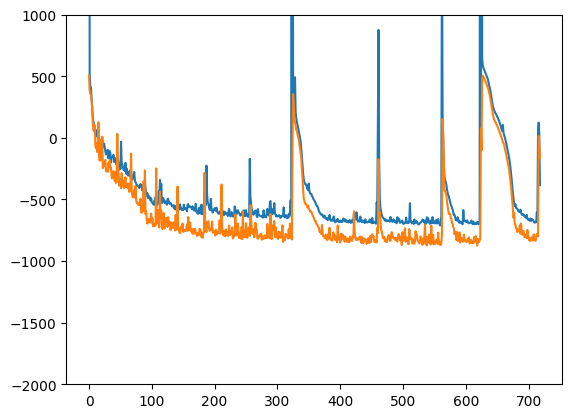

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  predict diverge [  15.34825682 -130.87684056] [  -1.29414823 -114.10167952] [271.30075  30.     ] [135.65038  15.     ] sim_timestep 135
48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  predict diverge [23.97787442 31.38555365] [2.68389692 7.9636836 ] [271.30075  30.     ] [135.65038  15.     ] sim_timestep 121
7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88

実環境方策rollout vs Sim環境方策rollout


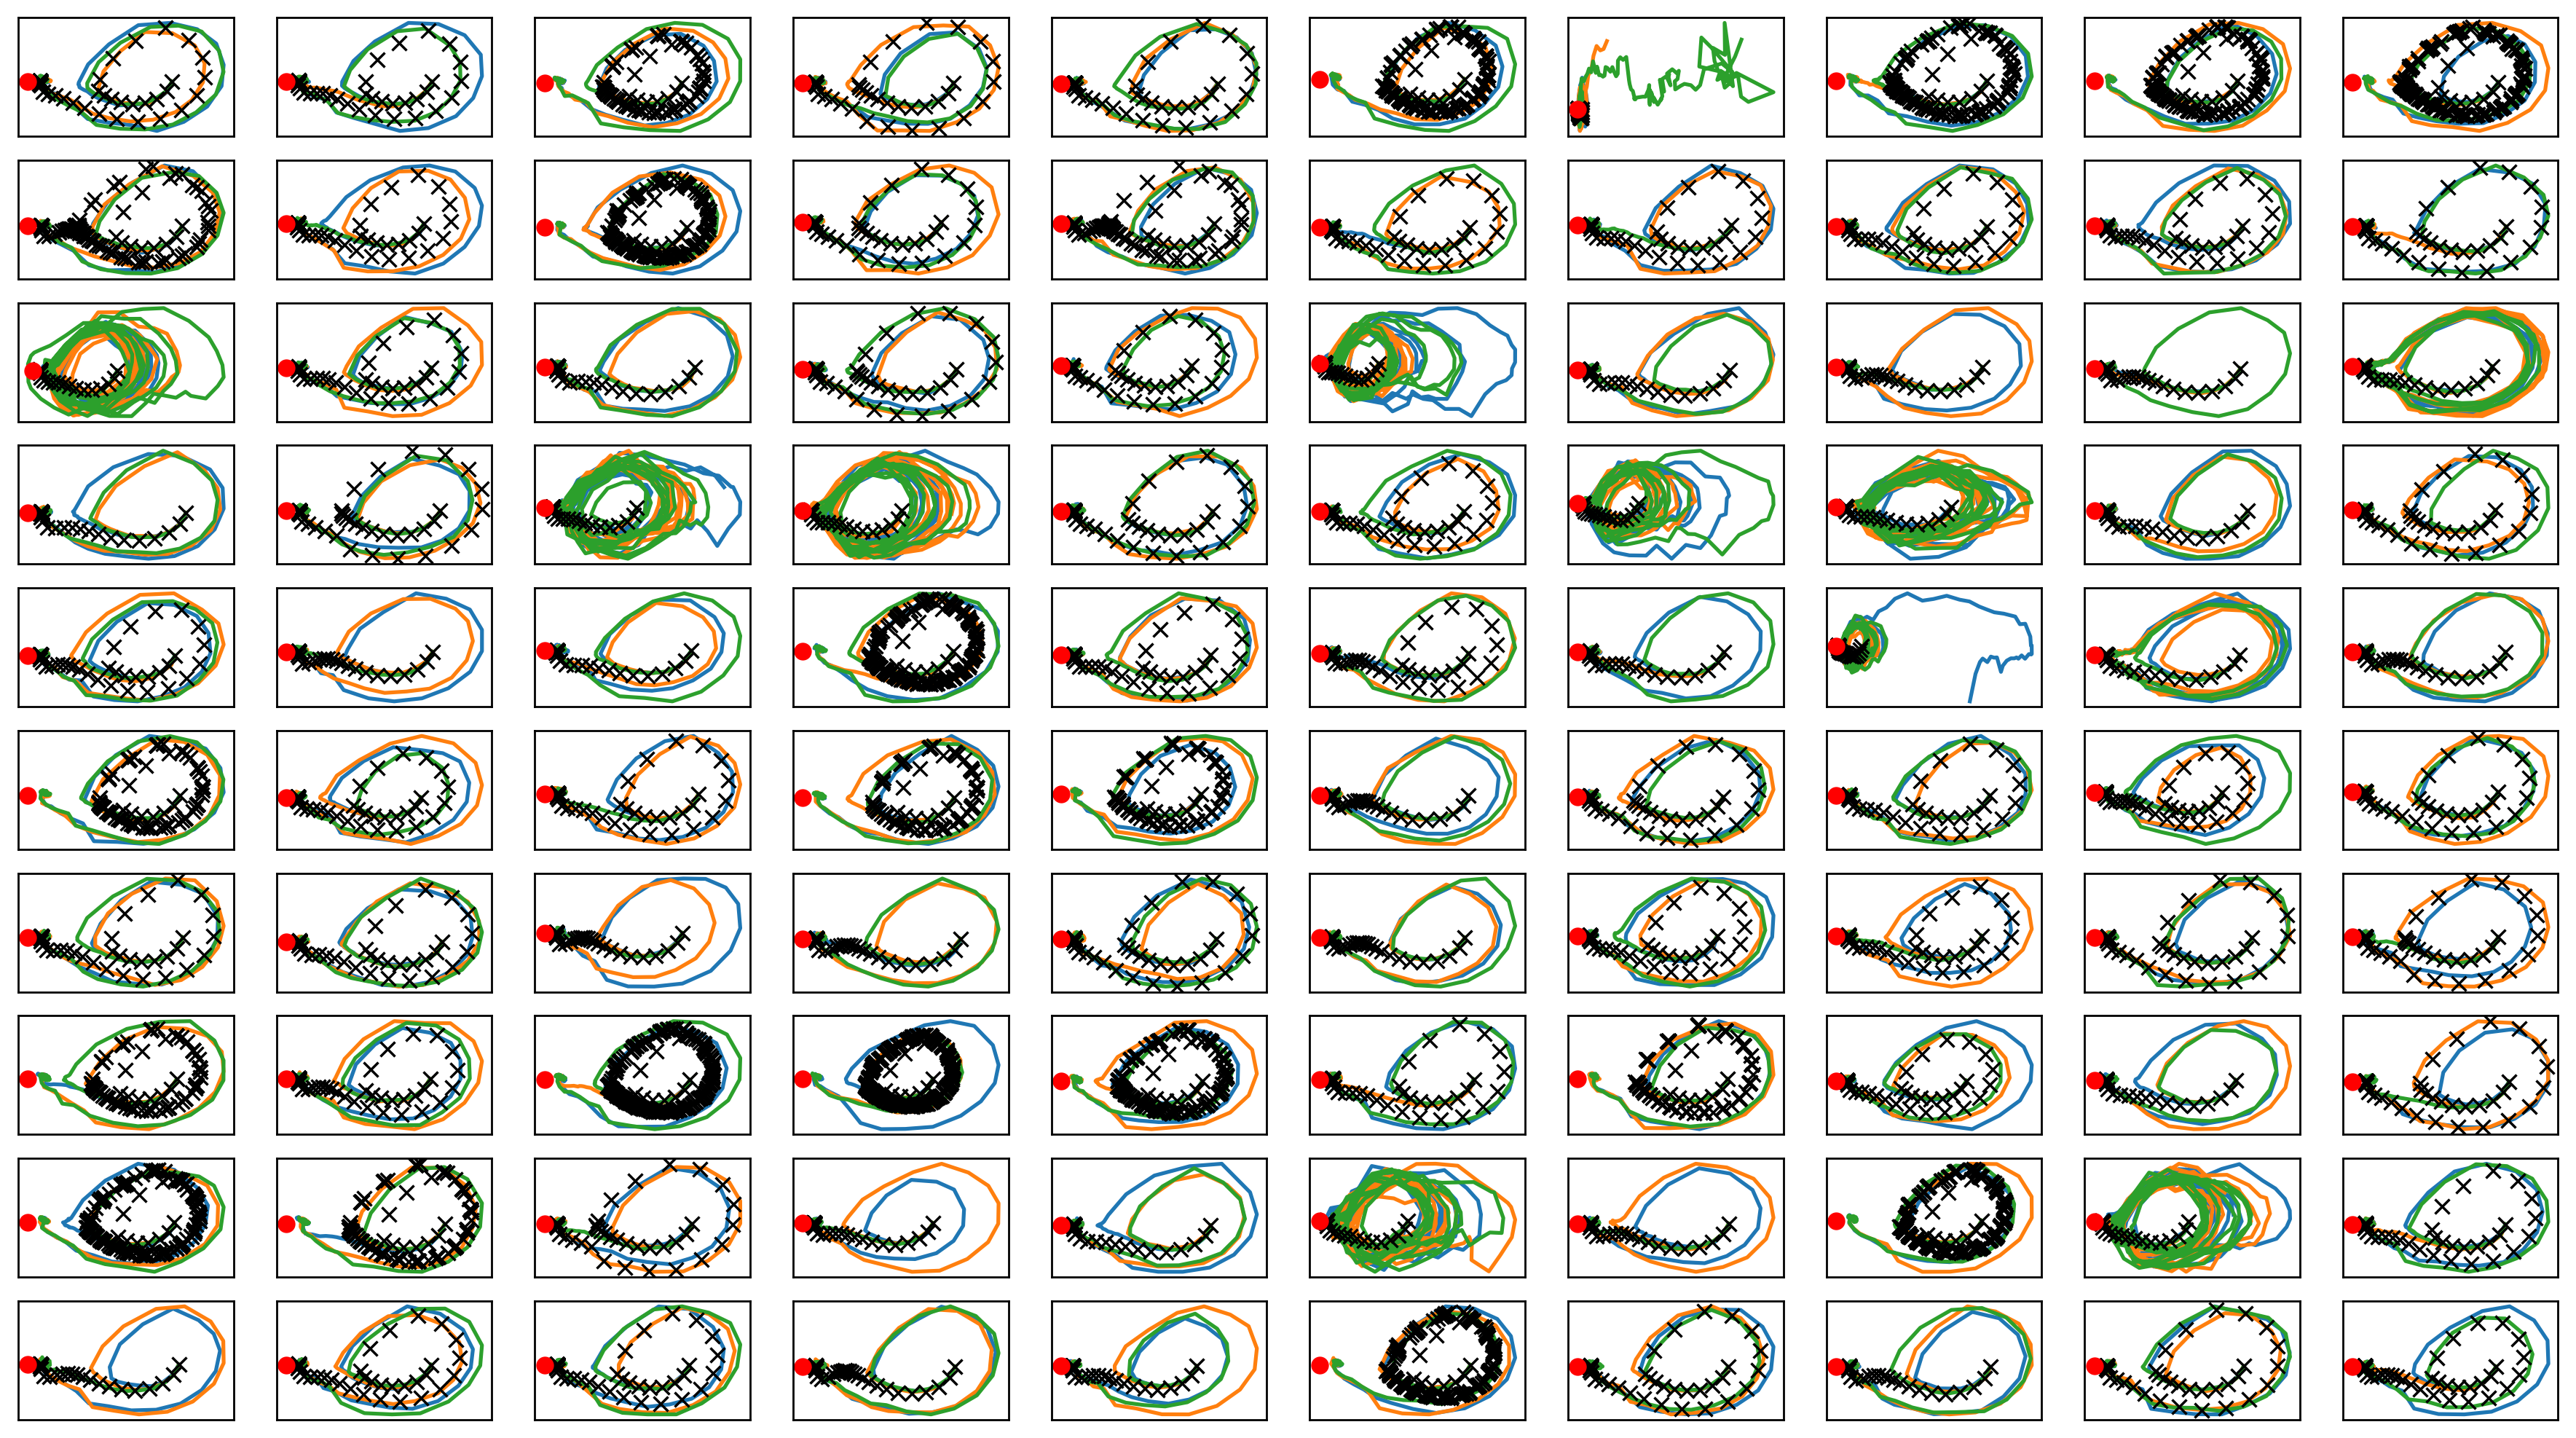

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

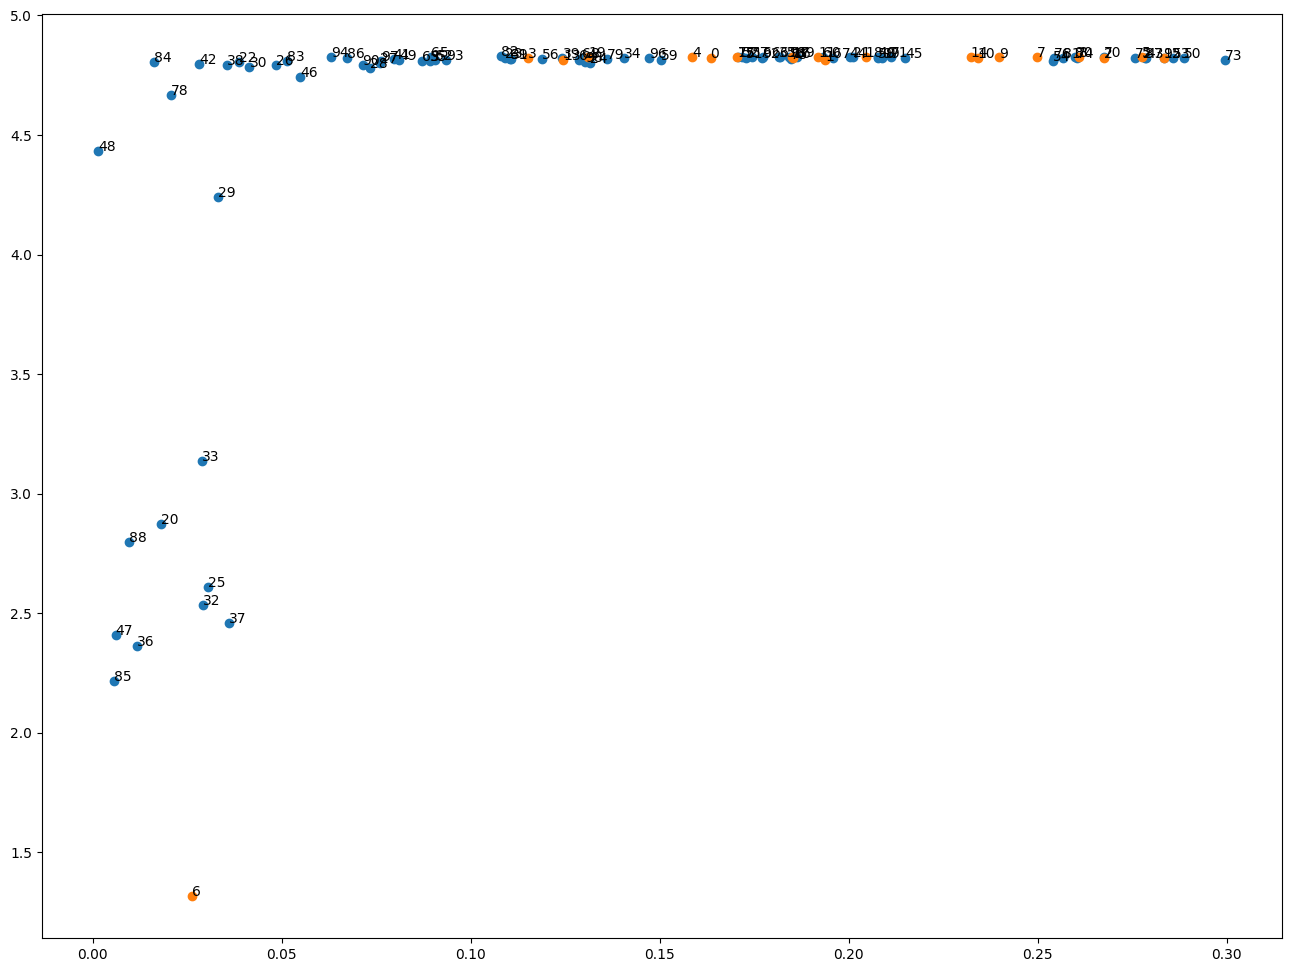

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


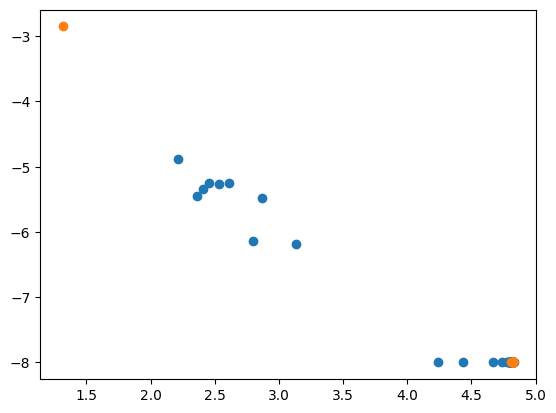

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 10.99036  validloss 12.00640±0.00000  bestvalidloss 12.00640  last_update 0
train: iter 1  trainloss 9.98443  validloss 10.91932±0.00000  bestvalidloss 10.91932  last_update 0
train: iter 2  trainloss 9.14520  validloss 9.95472±0.00000  bestvalidloss 9.95472  last_update 0
train: iter 3  trainloss 8.42620  validloss 9.14944±0.00000  bestvalidloss 9.14944  last_update 0
train: iter 4  trainloss 7.80583  validloss 8.42158±0.00000  bestvalidloss 8.42158  last_update 0
train: iter 5  trainloss 7.24976  validloss 7.82100±0.00000  bestvalidloss 7.82100  last_update 0
train: iter 6  trainloss 6.77039  validloss 7.28894±0.00000  bestvalidloss 7.28894  last_update 0
train: iter 7  trainloss 6.34201  validloss 6.82465±0.00000  bestvalidloss 6.82465  last_update 0
train: iter 8  trainloss 5.96753  validloss 6.38350±0.00000  bestvalidloss 6.38350  last_update 0
train: iter 9  trainloss 5.62840  validloss 6.04144±0.00000  bestvalidloss 6.04144  last_update 0
train: iter 10 

train: iter 87  trainloss 1.33672  validloss 1.40765±0.00000  bestvalidloss 1.40765  last_update 0
train: iter 88  trainloss 1.30728  validloss 1.35404±0.00000  bestvalidloss 1.35404  last_update 0
train: iter 89  trainloss 1.28765  validloss 1.32106±0.00000  bestvalidloss 1.32106  last_update 0
train: iter 90  trainloss 1.26342  validloss 1.37051±0.00000  bestvalidloss 1.32106  last_update 1
train: iter 91  trainloss 1.24408  validloss 1.27465±0.00000  bestvalidloss 1.27465  last_update 0
train: iter 92  trainloss 1.22653  validloss 1.31628±0.00000  bestvalidloss 1.27465  last_update 1
train: iter 93  trainloss 1.20512  validloss 1.25036±0.00000  bestvalidloss 1.25036  last_update 0
train: iter 94  trainloss 1.19266  validloss 1.23492±0.00000  bestvalidloss 1.23492  last_update 0
train: iter 95  trainloss 1.17330  validloss 1.23288±0.00000  bestvalidloss 1.23288  last_update 0
train: iter 96  trainloss 1.17144  validloss 1.17114±0.00000  bestvalidloss 1.17114  last_update 0
train: ite

train: iter 169  trainloss 1.07273  validloss 1.06319±0.00000  bestvalidloss 1.03918  last_update 27
train: iter 170  trainloss 1.05216  validloss 1.18610±0.00000  bestvalidloss 1.03918  last_update 28
train: iter 171  trainloss 1.07951  validloss 1.14834±0.00000  bestvalidloss 1.03918  last_update 29
train: iter 172  trainloss 1.08637  validloss 1.25449±0.00000  bestvalidloss 1.03918  last_update 30
train: iter 173  trainloss 1.09208  validloss 1.18223±0.00000  bestvalidloss 1.03918  last_update 31
train: iter 174  trainloss 1.06444  validloss 1.14988±0.00000  bestvalidloss 1.03918  last_update 32
train: iter 175  trainloss 1.04649  validloss 1.13268±0.00000  bestvalidloss 1.03918  last_update 33
train: iter 176  trainloss 1.07239  validloss 1.15481±0.00000  bestvalidloss 1.03918  last_update 34
train: iter 177  trainloss 1.07699  validloss 1.20247±0.00000  bestvalidloss 1.03918  last_update 35
train: iter 178  trainloss 1.06214  validloss 1.16692±0.00000  bestvalidloss 1.03918  last_

train: iter 258  trainloss 1.07438  validloss 1.15960±0.00000  bestvalidloss 0.93860  last_update 14
train: iter 259  trainloss 1.08623  validloss 1.14116±0.00000  bestvalidloss 0.93860  last_update 15
train: iter 260  trainloss 1.05837  validloss 1.16044±0.00000  bestvalidloss 0.93860  last_update 16
train: iter 261  trainloss 1.07131  validloss 1.16913±0.00000  bestvalidloss 0.93860  last_update 17
train: iter 262  trainloss 1.05929  validloss 1.05077±0.00000  bestvalidloss 0.93860  last_update 18
train: iter 263  trainloss 1.07164  validloss 1.13133±0.00000  bestvalidloss 0.93860  last_update 19
train: iter 264  trainloss 1.08714  validloss 1.17614±0.00000  bestvalidloss 0.93860  last_update 20
train: iter 265  trainloss 1.08598  validloss 1.10319±0.00000  bestvalidloss 0.93860  last_update 21
train: iter 266  trainloss 1.05181  validloss 1.04678±0.00000  bestvalidloss 0.93860  last_update 22
train: iter 267  trainloss 1.07400  validloss 1.19181±0.00000  bestvalidloss 0.93860  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 4.5528, -0.6904], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 15.93778  validloss 23.72334±0.00000  bestvalidloss 23.72334  last_update 0
train: iter 1  trainloss 10.11996  validloss 14.52313±0.00000  bestvalidloss 14.52313  last_update 0
train: iter 2  trainloss 6.91630  validloss 8.06870±0.00000  bestvalidloss 8.06870  last_update 0
train: iter 3  trainloss 5.61892  validloss 4.87269±0.00000  bestvalidloss 4.87269  last_update 0
train: iter 4  trainloss 5.34869  validloss 3.50975±0.00000  bestvalidloss 3.50975  last_update 0
train: iter 5  trainloss 5.22645  validloss 2.99981±0.00000  bestvalidloss 2.99981  last_update 0
train: iter 6  trainloss 4.97945  validloss 2.63335±0.00000  bestvalidloss 2.63335  last_update 0
train: iter 7  trainloss 4.60710  validloss 2.55106±0.00000  bestvalidloss 2.55106  last_update 0
train: iter 8  trainloss 4.38904  validloss 2.38546±0.00000  bestvalidloss 2.38546  last_update 0
train: iter 9  trainloss 4.36979  validloss 2.17713±0.00000  bestvalidloss 2.17713  last_update 0
train: iter 10

train: iter 84  trainloss 2.80465  validloss 0.92167±0.00000  bestvalidloss 0.76457  last_update 22
train: iter 85  trainloss 2.79704  validloss 0.80862±0.00000  bestvalidloss 0.76457  last_update 23
train: iter 86  trainloss 2.87611  validloss 1.16624±0.00000  bestvalidloss 0.76457  last_update 24
train: iter 87  trainloss 2.99344  validloss 1.01131±0.00000  bestvalidloss 0.76457  last_update 25
train: iter 88  trainloss 2.81724  validloss 0.95718±0.00000  bestvalidloss 0.76457  last_update 26
train: iter 89  trainloss 2.98456  validloss 0.77598±0.00000  bestvalidloss 0.76457  last_update 27
train: iter 90  trainloss 2.81132  validloss 0.84102±0.00000  bestvalidloss 0.76457  last_update 28
train: iter 91  trainloss 2.85026  validloss 0.79307±0.00000  bestvalidloss 0.76457  last_update 29
train: iter 92  trainloss 2.81080  validloss 0.99336±0.00000  bestvalidloss 0.76457  last_update 30
train: iter 93  trainloss 2.73571  validloss 1.00019±0.00000  bestvalidloss 0.76457  last_update 31


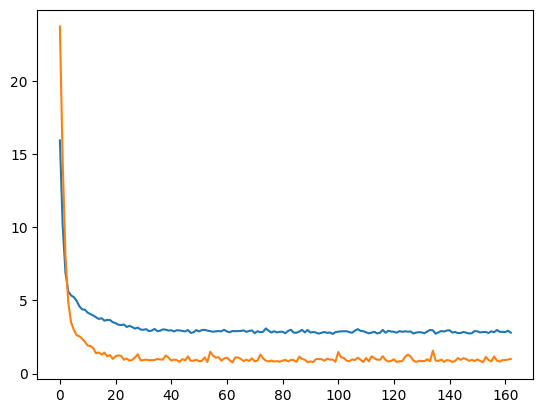

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(3.8625)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(7.9513)


In [21]:
print(vi.h_min_tilde)

-5.690607


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.7473254749059203
tensor([-1.1669])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

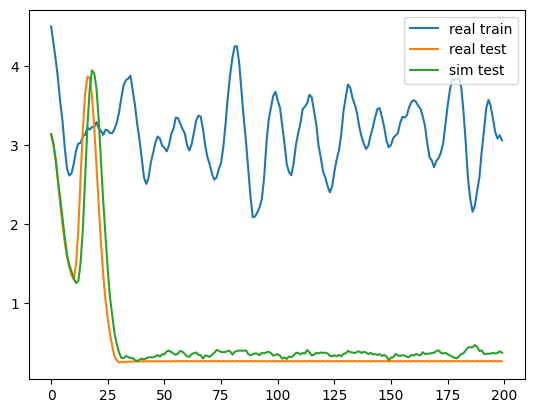

encoder [ 4.8244605 -8.       ]
initial_belief tensor([ 4.5528, -0.6904])
real train tensor([ 4.8400, -7.9944])
real test tensor([ 2.3480, -5.4563])
sim tensor([ 4.8170, -7.9980])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


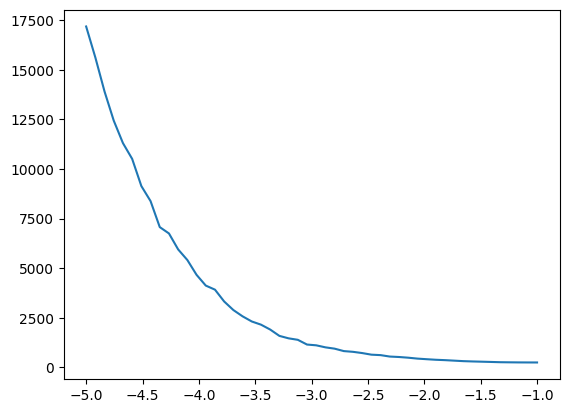

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.446960111612133
tensor([1.0876])
